In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus

import qiskit
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.visualization import plot_histogram

from quantumrings.toolkit.qiskit import QrBackendV2
from quantumrings.toolkit.qiskit import QrJobV1

import numpy as np


provider = QuantumRingsProvider(token ="rings-128.CvEHATBjdKwjlXLLCRqHPZ1g61HPELRZ", name="jtkeio@ucdavis.edu")
backend = provider.get_backend("scarlet_quantum_rings")

provider.active_account()

{'name': 'jtkeio@ucdavis.edu',
 'token': 'rings-128.CvEHATBjdKwjlXLLCRqHPZ1g61HPELRZ',
 'max_qubits': '128'}

In [2]:
shots = 10
numberofqubits = 3 #int(provider.active_account()["max_qubits"])

q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(numberofqubits , 'c')
qc = QuantumCircuit(q, c)



In [3]:
mybackend = QrBackendV2(provider, num_qubits = qc.num_qubits)
qc_transpiled = transpile(qc, mybackend, initial_layout=[i for i in range(0, qc.num_qubits)])

In [4]:
job = mybackend.run(qc_transpiled, shots = shots)

result = job.result()
counts = result.get_counts()
print("done!")

done!


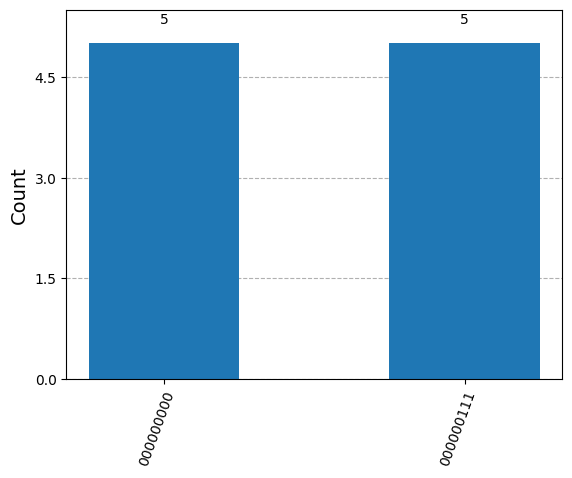

In [5]:
plot_histogram(counts)